## ANALYSIS ON RESUME

##  THE PROBLEM STATEMENT

* Here the problem statement is we need to find out the category of the candidate based on their skills

### Here it follows some steps to catergorize the data and based on the Historcal given Data we are going to predict the catergory of the candidate in future

#### steps
* Importing the packages
* Data Loading using the pandas
* Looking into the Basic Checks
* Exploratory Data Analysis
* Model Training
* Model Building
* Model Predicting

# importing the packages

In [1]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')


# Loading the Data and checking the basic checks

In [2]:
import pandas as pd
resume = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
resume.shape

(962, 2)

In [4]:
resume.size

1924

In [5]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
resume.describe().T

,count,unique,top,freq
Category,962,25,Java Developer,84
Resume,962,166,"Technical Skills Web Technologies: Angular JS,...",18


In [8]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = resume.isnull().sum().sort_values(ascending=False)
percentage = ((resume.isnull().sum()/len(resume)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Category,0,0.0
Resume,0,0.0


## VISULIZATION

<AxesSubplot:xlabel='count', ylabel='Category'>

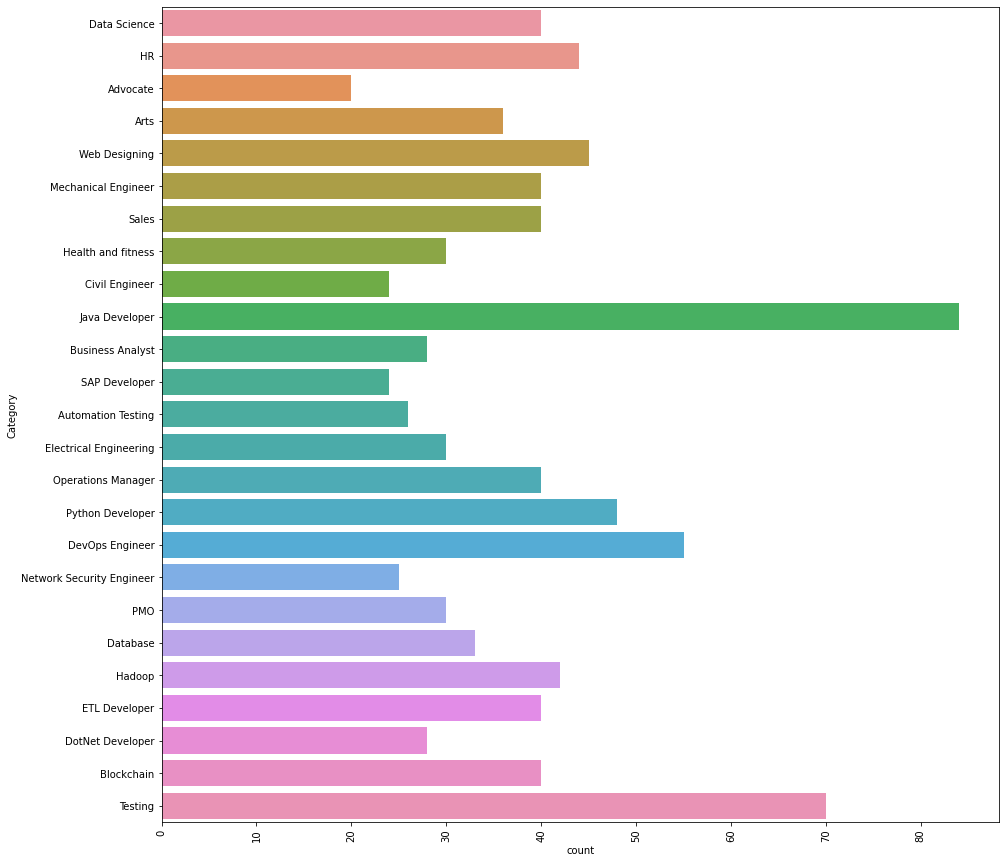

In [10]:
import seaborn as sns
import matplotlib.pyplot  as plt
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category",data=resume)

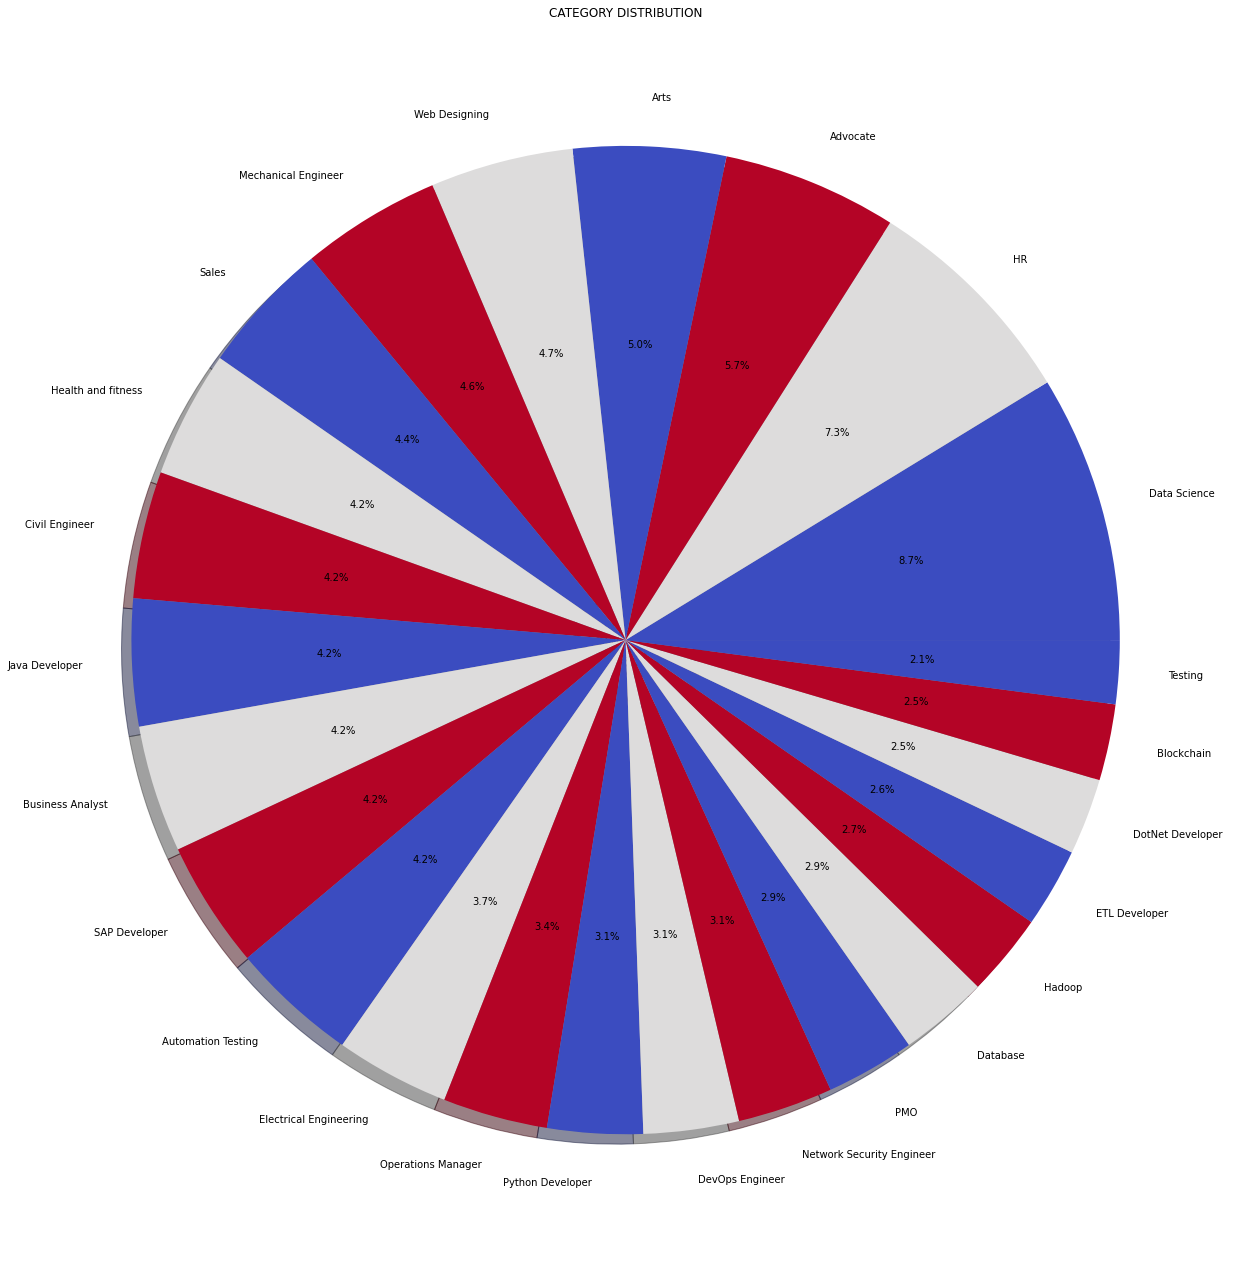

In [11]:
from matplotlib.gridspec import GridSpec
import numpy as np
targetCounts = resume['Category'].value_counts()
targetLabels  = resume['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(50,50))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

# Data Cleaning or Exploratory Data Analysis

Percentage for default

Java Developer               8.73
Testing                      7.28
DevOps Engineer              5.72
Python Developer             4.99
Web Designing                4.68
HR                           4.57
Hadoop                       4.37
Blockchain                   4.16
Data Science                 4.16
Sales                        4.16
Mechanical Engineer          4.16
ETL Developer                4.16
Operations Manager           4.16
Arts                         3.74
Database                     3.43
PMO                          3.12
Electrical Engineering       3.12
Health and fitness           3.12
DotNet Developer             2.91
Business Analyst             2.91
Automation Testing           2.70
Network Security Engineer    2.60
Civil Engineer               2.49
SAP Developer                2.49
Advocate                     2.08
Name: Category, dtype: float64


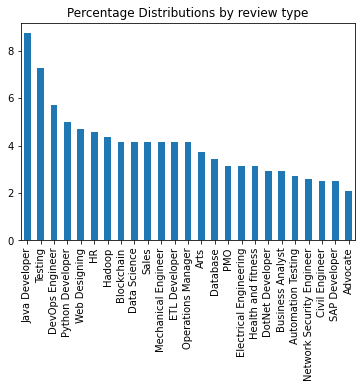

In [12]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(resume.Category.value_counts(normalize=True)*100,2))
round(resume.Category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [13]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [14]:
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [15]:
# Let's take a look at the updated text
resume['cleaned_Resume'] = pd.DataFrame(resume.Resume.apply(cleaned1))
resume.head(10)

,Category,Resume,cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \r\nmay to may be uitrgp...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details \r\n mca ymcaust faridaba...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skills â¢ python â¢ tableau â¢ data visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education details \r\n btech rayat and bahra...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skills â¢ ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data and quantitative analysis â...


In [16]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [17]:
# Let's take a look at the updated text
resume['cleaned_resume_new'] = pd.DataFrame(resume['cleaned_Resume'].apply(cleaned2))
resume.head(10)

,Category,Resume,cleaned_Resume,cleaned_resume_new
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \r\nmay to may be uitrgp...,education details \rmay to may be uitrgpv\...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details \r\n mca ymcaust faridaba...,education details \r mca ymcaust faridabad ...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skills c basics iot python matlab data science...,skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skills â¢ python â¢ tableau â¢ data visuali...,skills â¢ python â¢ tableau â¢ data visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education details \r\n btech rayat and bahra...,education details \r btech rayat and bahra i...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skills â¢ ability to quickly grasp t...,personal skills â¢ ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise â data and quantitative analysis â...,expertise â data and quantitative analysis â...


In [18]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [19]:
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))
print (resume['cleaned_resume'])

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: cleaned_resume, Length: 962, dtype: object


In [20]:
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))
print (resume['cleaned_resume'][3])

Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Exprience 6 months RETAIL MARKETING Exprience 6 months SCM Exprience 6 months SQL Exprience Less than 1 year months Deep Learning Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Python Exprience Less than 1 year months R Exprience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing historic deals and comi

In [31]:
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))
resume.head(85)

,Category,Resume,cleaned_Resume,cleaned_resume_new,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...,skills programming languages python pandas nu...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \r\nmay to may be uitrgp...,education details \rmay to may be uitrgpv\...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,areas of interest deep learning control system...,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills â¢ r â¢ python â¢ sap hana â¢ table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details \r\n mca ymcaust faridaba...,education details \r mca ymcaust faridabad ...,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...,...,...
80,HR,KEY SKILLS: â¢ Computerized accounting with t...,key skills â¢ computerized accounting with ta...,key skills â¢ computerized accounting with ta...,KEY SKILLS Computerized a ounting with tally S...
81,HR,Training in Special Education (Certificate Cou...,training in special education certificate cour...,training in special education certificate cour...,Training in Special Education Certificate Cour...
82,HR,Computer Knowledge: â¢ Proficient in basic us...,computer knowledge â¢ proficient in basic use...,computer knowledge â¢ proficient in basic use...,Computer Knowledge Proficient in basic use of ...
83,HR,SOFTWARE SKILLS: â¢ General Computer Proficie...,software skills â¢ general computer proficien...,software skills â¢ general computer proficien...,SOFTWARE SKILLS General Computer Proficiency P...


In [22]:
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))
print (resume['cleaned_resume'][61])

SOFTWARE SKILLS General Computer Proficiency Program Langages known C C Java Web Programming Tools Software know MATLAB DBMS KEY STRENGTHS Posse s Good communication and analytic skills Positive thinking Sincere Hard work Honesty Responsibility Enthusiastic to learn new skills take up new tasks Self motivated Ready to a ept challenges Education Details January 2014 to January 2017 BE in computer science and engineering computer science engineering Adichunchanagiri institute of technology chikmagalur HR Skill Details DATABASE MANAGEMENT SYSTEM Exprience 6 months DBMS Exprience 6 months JAVA Exprience 6 months MATLAB Exprience 6 monthsCompany Details company Yours Truly description Jayashree H K 


In [29]:
resume['cleaned_resume'] = resume.Resume.apply(lambda x: cleanResume(x))
print (resume['cleaned_resume'][85])

Education Details B Com LL B University of Clacutta University of Burdwan ADVOCATE Skill Details Taxation matters Income Tax GST P Tax A ounts Exprience Less than 1 year months Filing of Income Tax Returns GST Returns e TDS AIR and more Exprience Less than 1 year monthsCompany Details company own practice description 1 Drafting and preparation of plaint A ounts and move before relevant Authority to hear the cases


# Model Training

In [23]:
from sklearn.model_selection import train_test_split

Independent_var = resume.cleaned_resume
Dependent_var = resume.Category

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.2, random_state = 42)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 769
IV_test  : 193
DV_train : 769
DV_test  : 193


# Model Buidling 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [32]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0, 

# Importing the required packages for finding out the accuracy

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test,average='macro'))
print("Recall : ", recall_score(predictions, DV_test,average='macro'))

Accuracy :  0.9948186528497409
Precision :  0.9971428571428572
Recall :  0.995


# PREDICITONS

In [27]:
example = ["SOFTWARE SKILLS General Computer Proficiency Program Langages known C C Java Web Programming Tools Software know MATLAB DBMS KEY STRENGTHS Posse s Good communication and analytic skills Positive thinking Sincere Hard work Honesty Responsibility Enthusiastic to learn new skills take up new tasks Self motivated Ready to a ept challenges Education Details January 2014 to January 2017 BE in computer science and engineering computer science engineering Adichunchanagiri institute of technology chikmagalur HR Skill Details DATABASE MANAGEMENT SYSTEM Exprience 6 months DBMS Exprience 6 months JAVA Exprience 6 months MATLAB Exprience 6 monthsCompany Details company Yours Truly description Jayashree H K  "]
result = model.predict(example)


print(result)

['HR']


In [28]:
example =["Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru Karnataka New Horizon College of Engineering Bangalore Visvesvaraya Technological University Data Science Consultant Consultant Deloitte USI Skill Details LINEAR PROGRAMMING Exprience 6 months RETAIL Exprience 6 months RETAIL MARKETING Exprience 6 months SCM Exprience 6 months SQL Exprience Less than 1 year months Deep Learning Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Python Exprience Less than 1 year months R Exprience Less than 1 year monthsCompany Details company Deloitte USI description The project involved analysing historic deals and coming with insights to optimize future deals Role Was given raw data carried out end to end analysis and presented insights to client Key Responsibilities Extract data from client systems across geographies Understand and build reports in tableau Infer meaningful insights to optimize prices and find out process blockades Technical Environment R Tableau Industry Cross Industry Service Area Cross Industry Products Project Name Handwriting recognition Consultant 3 months The project involved taking handwritten images and converting them to digital text images by object detection and sentence creation Role I was developing sentence correction functionality Key Responsibilities Gather data large enough to capture all English words Train LSTM models on words Technical Environment Python Industry Finance Service Area Financial Services BI development Project Name SWIFT Consultant 8 months The project was to develop an analytics infrastructure on top of SAP S 4 it would user to view financial reports to respective departments Reporting also included forecasting expenses Role I was leading the offshore team Key Responsibilities Design Develop data models for reporting Develop ETL for data flow Validate various reports Technical Environment SAP HANA Tableau SAP AO Industry Healthcare Analytics Service Area Life Sciences Product development Project Name Clinical Healthcare System Consultant 2 months The project was to develop an analytics infrastructure on top of Argus it would allow users to query faster and provide advance analytics capabilities Role I was involved from design to deploy phase performed a lot of data restructuring and built models for insights Key Responsibilities Design Develop data models for reporting Develop and deploy analytical models Validate various reports Technical Environment Data Modelling SAP HANA Tableau NLP Industry FMCG Service Area Trade Promotion Project Name Consumption Based Planning for Flowers Foods Consultant 8 months The project involved setting up of CRM and CBP modules Role I was involved in key data decomposition activities and setting up the base for future year forecast Over the course of the project I developed various models and carried out key performance improvements Key Responsibilities Design Develop HANA models for decomposition Develop data flow for forecast Developed various views for reporting of Customer Sales Funds Validate various reports in BOBJ Technical Environment Data Modelling SAP HANA BOBJ Time Series Forecasting Internal Initiative Industry FMCG Customer Segmentation and RFM analysis Consultant 3 months The initiative involved setting up of HANA Python interface and advance analytics on Python Over the course I had su essfully segmented data into five core segments using K means and carried out RFM analysis in Python Also developed algorithm to categorize any new customer under the defined buckets Technical Environment Anaconda3 Python3 6 HANA SPS12 Industry Telecom Invoice state detection Consultant 1 months The initiative was to reduce the manual effort in verifying closed and open invoices manually it involved development to a decision tree to classify open closed invoices This enabled effort reduction by 60 Technical Environment R SAP PAL SAP HANA SPS12 A enture Experience Industry Analytics Cross Industry In Process Analytics for SAP Senior Developer 19 months A enture Solutions Pvt Ltd India The project involved development of SAP analytics tool In Process Analytics IPA My role was to develop database objects and data models to provide operational insights to clients Role I have developed various Finance related KPIs and spearheaded various deployments Introduced SAP Predictive analytics to reduce development time and reuse functionalities for KPIs and prepared production planning reports Key Responsibilities Involved in information gather phase Designed and implemented SAP HANA data modelling using Attribute View Analytic View and Calculation View Developed various KPI s individually using complex SQL scripts in Calculation views Created procedures in HANA Database Took ownership and developed Dashboard functionality Involved in building data processing algorithms to be executed in R server for cluster analysis Technical Environment R SAP HANA T SQL Industry Cross Industry A enture Testing A elerator for SAP Database Developer 21 months A enture Solutions Pvt Ltd India Role I have taken care of all development activities for the ATAS tool and have also completed various deployments of the product Apart from these activities I was also actively involved in maintenance of the database servers Production Quality Key Responsibilities Analyzing business requirements understanding the scope getting requirements clarified interacting with business and further transform all requirements to generate attribute mapping documents and reviewing mapping specification documentation Create Update database objects like tables views stored procedures function and packages Monitored SQL Server Error Logs and Application Logs through SQL Server Agent Prepared Data Flow Diagrams Entity Relationship Diagrams using UML Responsible for Designing developing and Normalization of database tables Experience in performance tuning using SQL profiler Involved in QA UAT knowledge transfer and support activities Technical Environment SQL Server 2008 2014 Visual Studio 2010 Windows Server Performance Monitor SQL Server Profiler C PL SQL T SQL "]
result = model.predict(example)

print(result)

['Data Science']


In [33]:
example = ["SOFTWARE SKILLS General Computer Proficiency Program Langages known C C Java Web Programming Tools Software know MATLAB DBMS KEY STRENGTHS Posse s Good communication and analytic skills Positive thinking Sincere Hard work Honesty Responsibility Enthusiastic to learn new skills take up new tasks Self motivated Ready to a ept challenges Education Details January 2014 to January 2017 BE in computer science and engineering computer science engineering Adichunchanagiri institute of technology chikmagalur HR Skill Details DATABASE MANAGEMENT SYSTEM Exprience 6 months DBMS Exprience 6 months JAVA Exprience 6 months MATLAB Exprience 6 monthsCompany Details company Yours Truly description Jayashree H K  "]
result = model.predict(example)


print(result)

['HR']


In [30]:
example = ["Education Details B Com LL B University of Clacutta University of Burdwan ADVOCATE Skill Details Taxation matters Income Tax GST P Tax A ounts Exprience Less than 1 year months Filing of Income Tax Returns GST Returns e TDS AIR and more Exprience Less than 1 year monthsCompany Details company own practice description 1 Drafting and preparation of plaint A ounts and move before relevant Authority to hear the cases"]
result = model.predict(example)


print(result)

['Advocate']


In [34]:
example = ["Have done python programmig languages machine Learning model and deep learning "]
result = model.predict(example)


print(result)

['Data Science']


In [35]:
import pickle
pickle.dump(clf2 , open('clf2.sav','wb'))

# Conclusion

Based on the historical data my model is predicting correctly

